In [1]:
import json
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

In [2]:
import sys
sys.path.append("../../../")

from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph
from graph_dynamics.networks.communities import CommunityGraph

from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment
from graph_dynamics.dynamics import GenerativeDynamicsCommunities
from graph_dynamics.networks import communities
from graph_dynamics.embeddings import node2vec

In [3]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [4]:
Macrostates.macrostate_function_dictionary.keys()

['degree_distribution',
 'pagerank',
 'deepwalk_online',
 'new_nodes',
 'basic_stats',
 'bigclam',
 'node2vec_macrostates',
 'node2vec_online_macrostates']

In [5]:
number_of_steps = 100
number_of_steps_in_memory = 1

forest_fire_communities_parameters = {0:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},                                                                                                                                                                                                                                                                                                                                                 
                                      1:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      2:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      3:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.22,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.}}

numberOfCommunitiesAndNoise = len(forest_fire_communities_parameters.keys())

#back ground evolution
timeSeriesCommunity0 = np.ones(number_of_steps)*0
timeSeriesCommunity0[0] = 0

timeSeriesCommunity1 = np.ones(number_of_steps)*5
timeSeriesCommunity1[0] = 30

timeSeriesCommunity2 = np.ones(number_of_steps)*1
timeSeriesCommunity2[0] = 30

timeSeriesCommunity3 = np.ones(number_of_steps)*1
timeSeriesCommunity3[0] = 30

timeSeriesOfCommunities = {0:timeSeriesCommunity0,
                           1:timeSeriesCommunity1,
                           2:timeSeriesCommunity2,
                           3:timeSeriesCommunity3}

#the initial size of the community is that as defined by the time series
numberOfNodesPerCommunities = [timeSeriesOfCommunities[c][0] for c in range(1,numberOfCommunitiesAndNoise)]
numberOfBridgesPerCommunity = [2,2,2]
barabasiParameter = 3
initial_graph, subGraphs,Q,bridgesInCommunity = communities.barabasiAlbertCommunities(numberOfNodesPerCommunities, 
                                                                                      numberOfBridgesPerCommunity, 
                                                                                      barabasiParameter)
initial_communities = {c:subGraphs[c-1].nodes() for c in range(1,numberOfCommunitiesAndNoise)}
initial_communities[0]=[]


simulations_directory = "./Simulations/"

DYNAMICS_PARAMETERS = {"number_of_steps":number_of_steps,
                        "number_of_steps_in_memory":number_of_steps_in_memory,
                        "simulations_directory":simulations_directory,
                        "dynamics_identifier":"CommunityForestFire4",
                        "graph_class":"CommunityGraph",
                        "verbose":True,
                        "datetime_timeseries":False,
                        "initial_date":1}

DYNAMICS_PARAMETERS["macrostates"] =  [("basic_stats",())]
gd_directory = "./Simulations/CommunityForestFire4_gd/"

community_graph = CommunityGraph(identifier_string="Communities",
                                 initial_comunities=initial_communities,
                                 networkx_graph=initial_graph)

dynamics_object = GenerativeDynamicsCommunities.CommunitiesForestFire(community_graph,
                                                                      initial_communities,
                                                                      forest_fire_communities_parameters,
                                                                      timeSeriesOfCommunities,
                                                                      DYNAMICS_PARAMETERS)

New Dynamics Directory


# Dynamics

In [6]:
dynamics_object.evolve(100,community_graph)

#100 STEPS EVOLUTION STARTED FOR CommunityForestFire4
#STARTING EVOLUTION AT STEP 0
Number of initial nodes:  90
All graph in memory
90
last guy
90
1
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
97
last guy
97
2
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  3

202
17
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
209
last guy
209
18
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  4

All graph in memory
307
last guy
307
32
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
314
last guy
314
33
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
398
last guy
398
45
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
405
last guy
405
46
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
489
last guy
489
58
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
496
last guy
496
59
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
580
last guy
580
71
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
587
last guy
587
72
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
671
last guy
671
84
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
678
last guy
678
85
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

All graph in memory
762
last guy
762
97
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.  447.  454.  461.  468.  475.  482.  489.  496.  503.
  510.  517.  524.  531.  538.  545.  552.  559.  566.  573.  580.  587.
  594.  601.  608.  615.  622.  629.  636.  643.  650.  657.  664.  671.
  678.  685.  692.  699.  706.  713.  720.  727.  734.  741.  748.  755.
  762.  769.  776.  783.]
All graph in memory
769
last guy
769
98
[  90.   97.  104.  111.  118.  125.  132.  139.  146.  153.  160.  167.
  174.  181.  188.  195.  202.  209.  216.  223.  230.  237.  244.  251.
  258.  265.  272.  279.  286.  293.  300.  307.  314.  321.  328.  335.
  342.  349.  356.  363.  370.  377.  384.  391.  398.  405.  412.  419.
  426.  433.  440.

In [7]:
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics CommunityForestFire4
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                            

## Online node2vec

In [8]:
model = Word2Vec(size=2, window=10, min_count=0, sg=1, workers=8, iter=1)

nargs = {"directed":False,
         "p":0.001,
         "q":2,
         "num_walks":10,
         "walk_length":80,
         "weighted":False,
         "undirected":True,
         "model": model}

nx_G = nx.read_edgelist(gd_directory + DYNAMICS_PARAMETERS['dynamics_identifier'] +'_gGD_0_.gd')
G = node2vec.Graph(nx_G,
                   nargs["directed"],
                   nargs["p"],
                   nargs["q"])
G.preprocess_transition_probs()

walks = G.simulate_walks(nargs["num_walks"],
                         nargs["walk_length"])
walks = [map(str, walk) for walk in walks]

model.build_vocab([map(str, nx_G.nodes())])
model.train(walks, total_examples=model.corpus_count, epochs=model.iter)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


28063

In [9]:


macrostates_run_ideintifier = "node2vec_online" 
macrostates_names  = [("node2vec_online_macrostates",(nargs,))]

window = 1
rolling = True
Macrostates.evaluate_vanilla_macrostates_window(gd_directory,
                                                macrostates_names, 
                                                macrostates_run_ideintifier, 
                                                window, 
                                                rolling)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 1 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 2 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 3 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 4 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 5 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 6 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 7 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 8 for node2vec_online


Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 67 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 68 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 69 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 70 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 71 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 72 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 73 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 74 for node2vec

# READ ALL ALIGNEMENTS

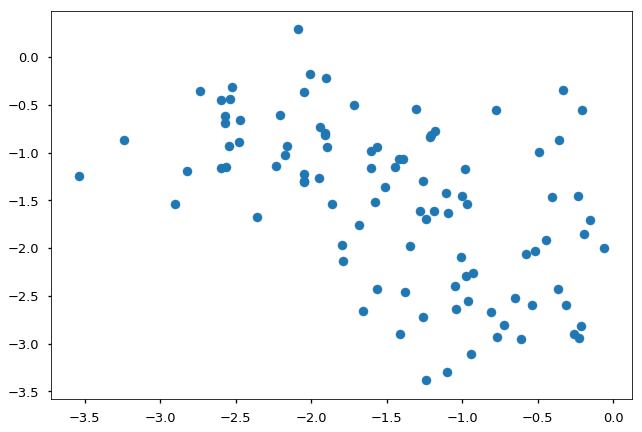

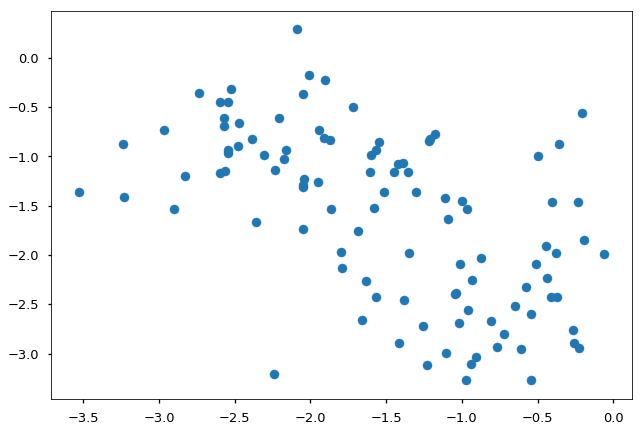

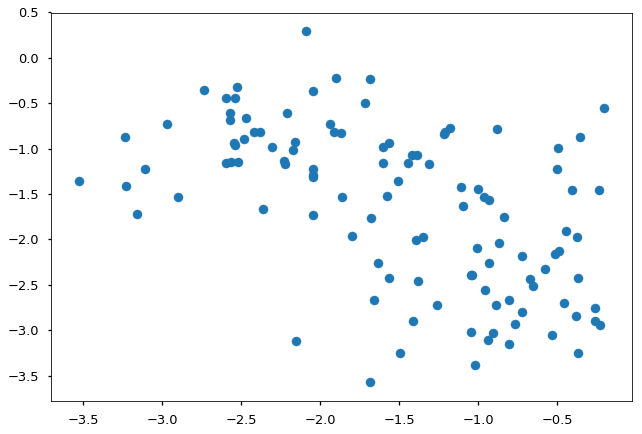

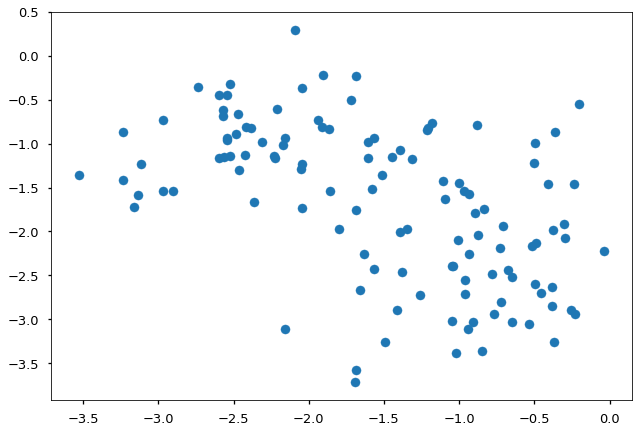

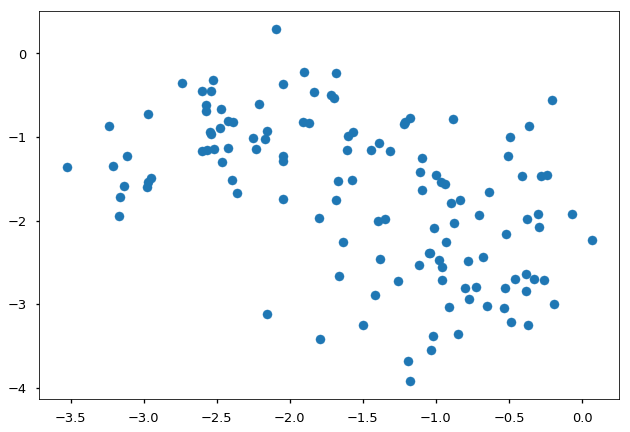

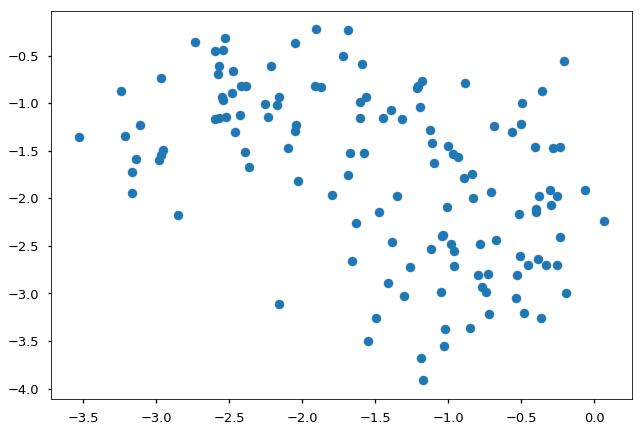

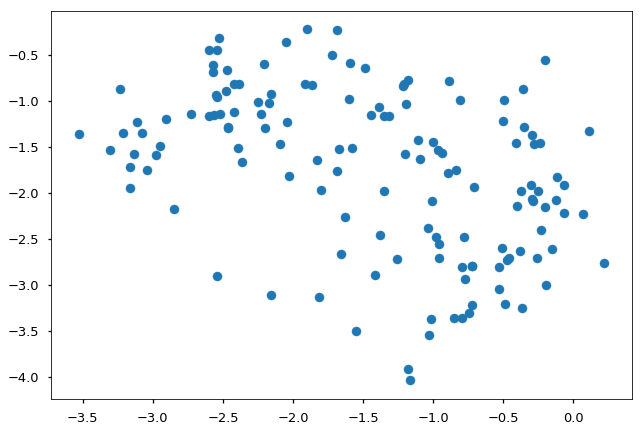

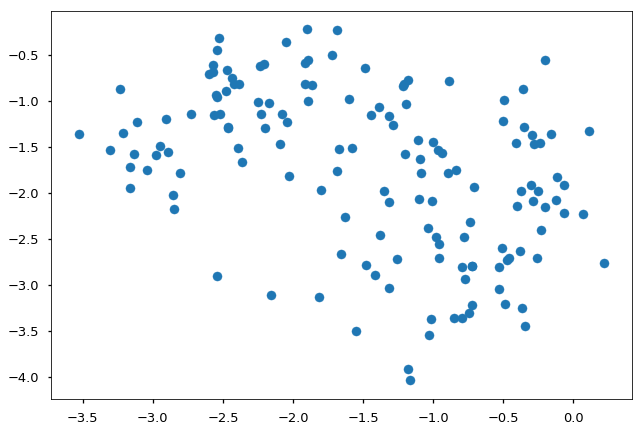

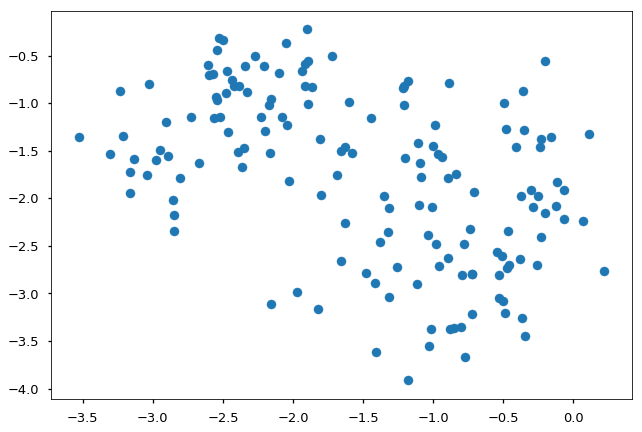

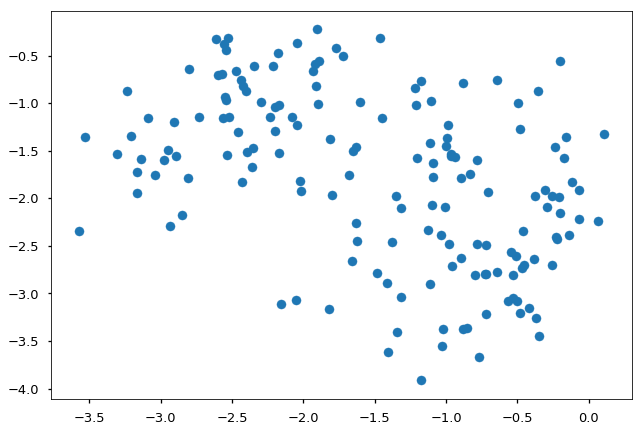

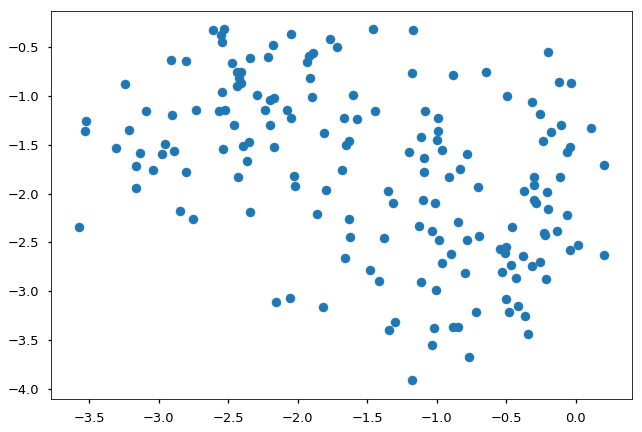

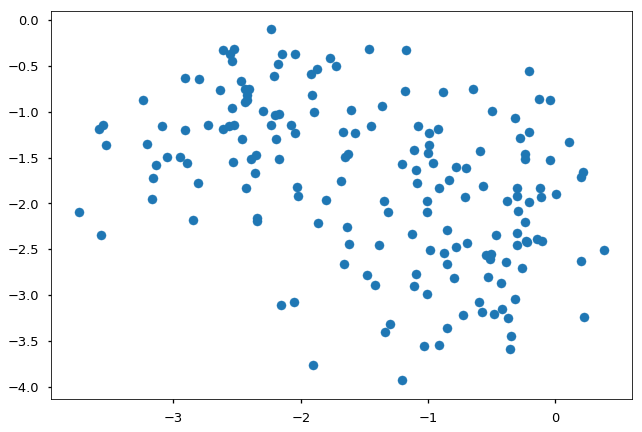

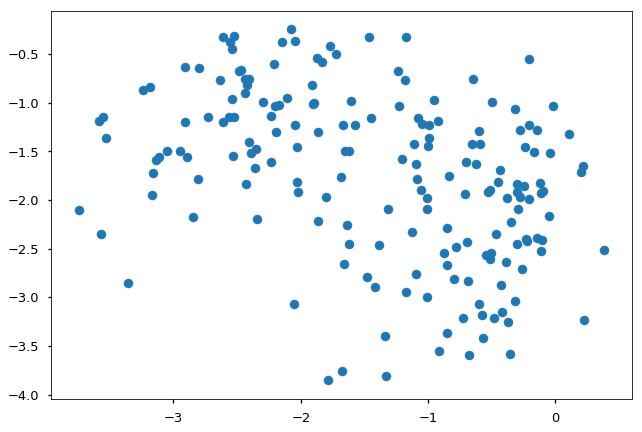

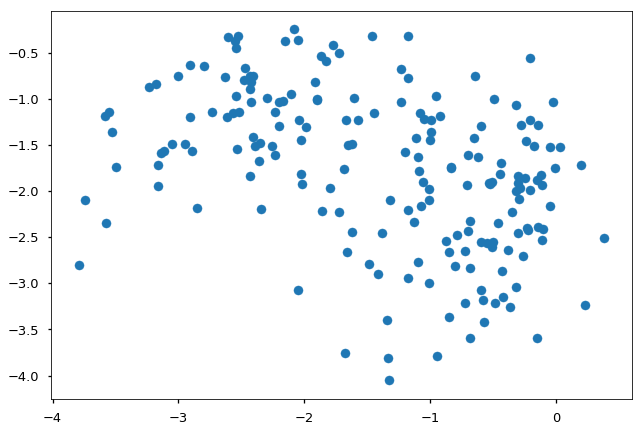

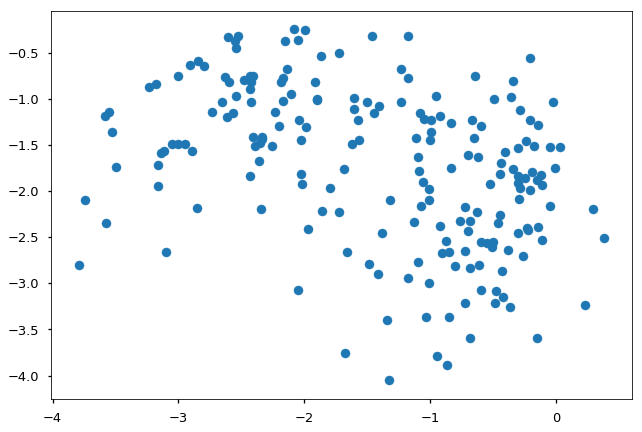

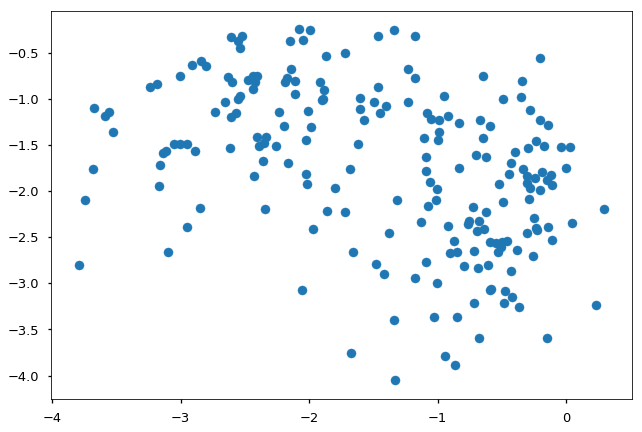

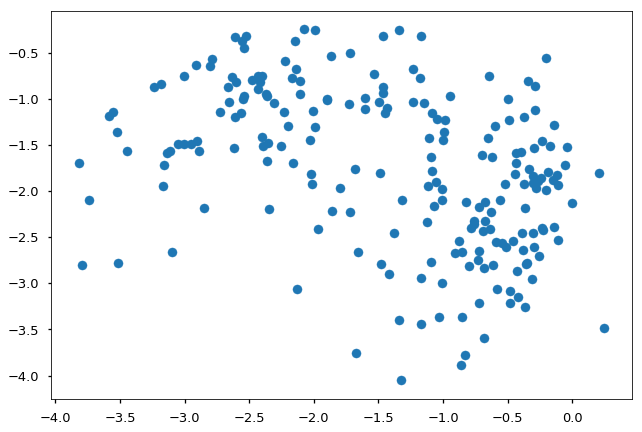

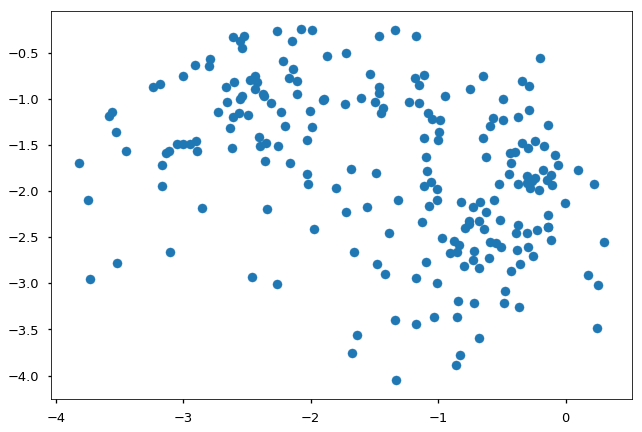

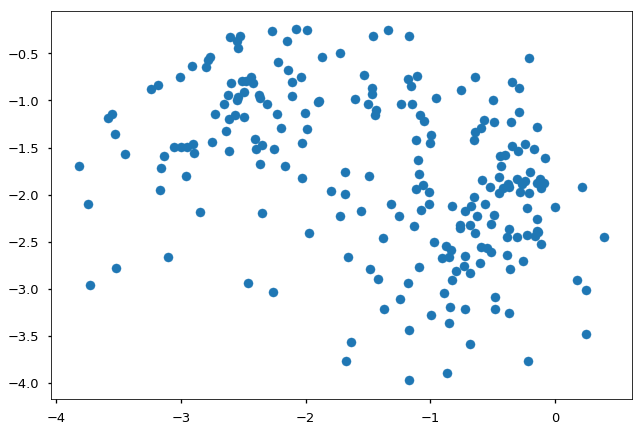

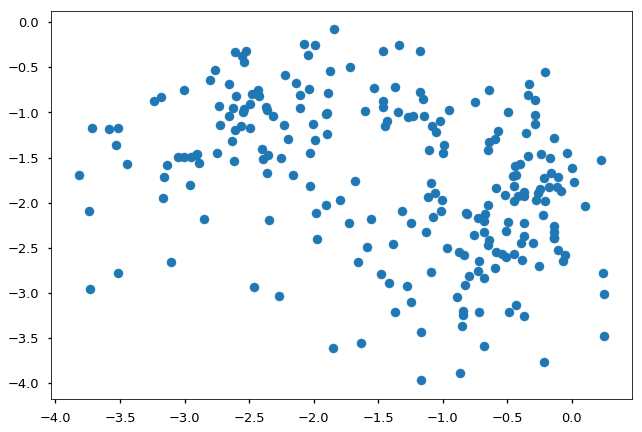

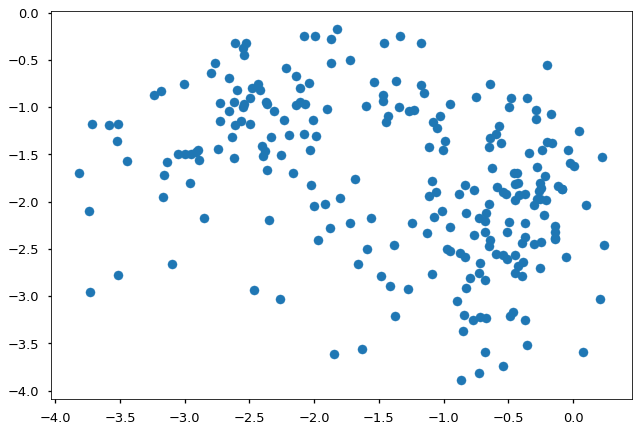

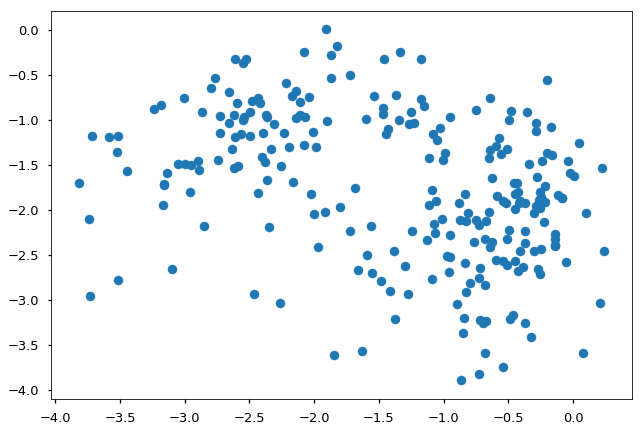

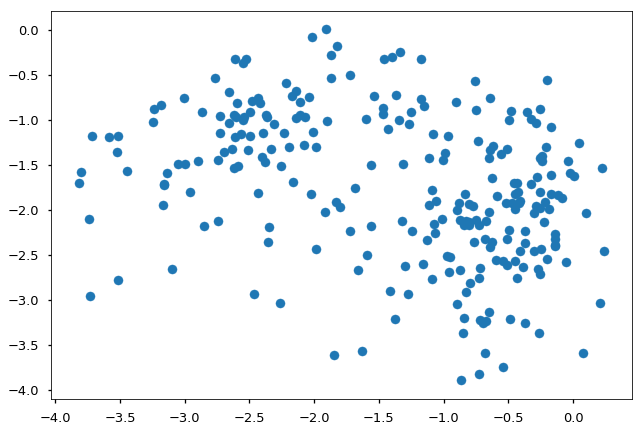

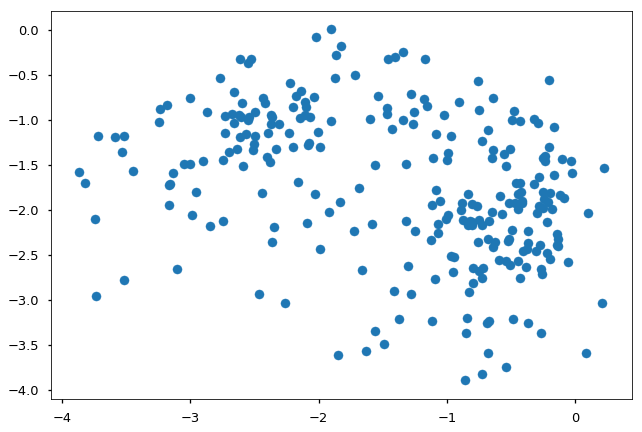

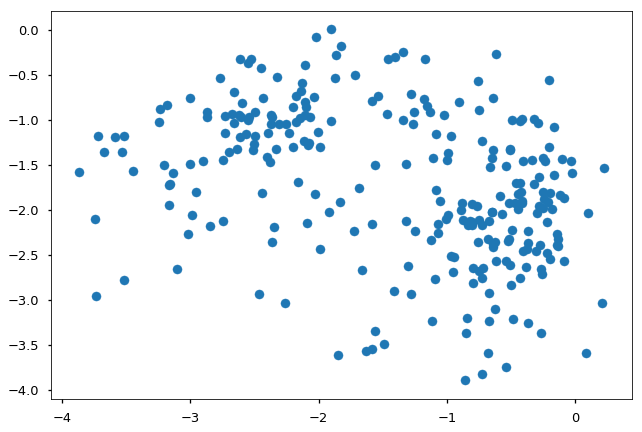

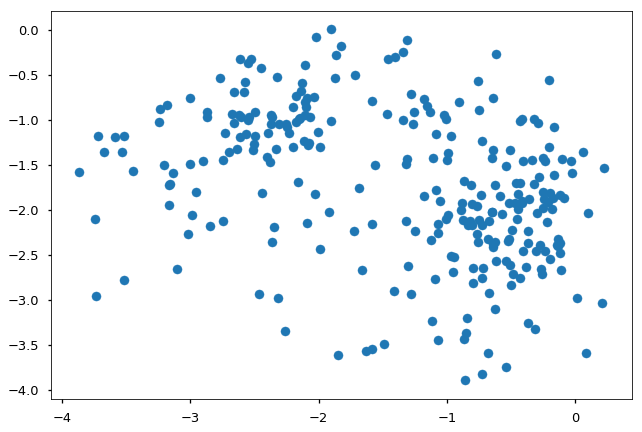

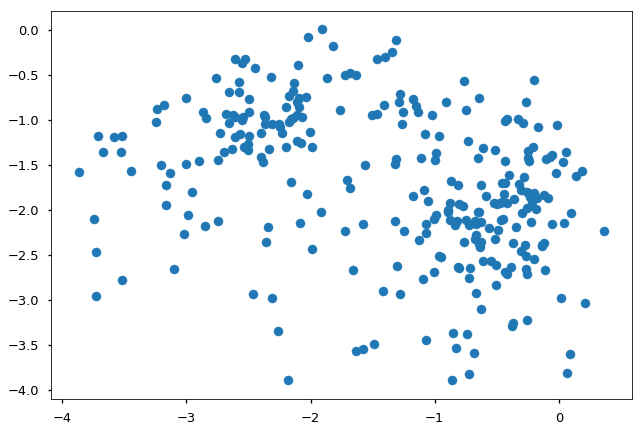

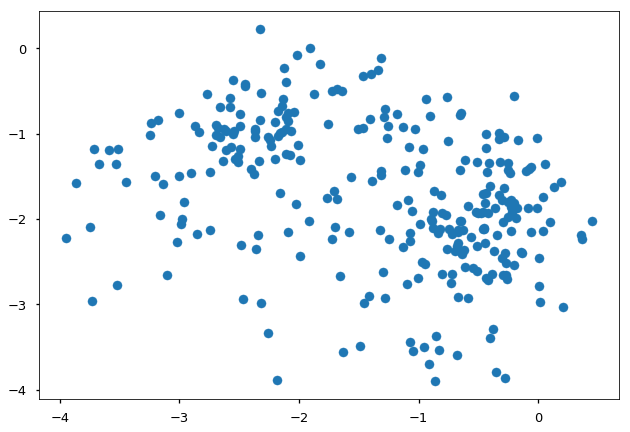

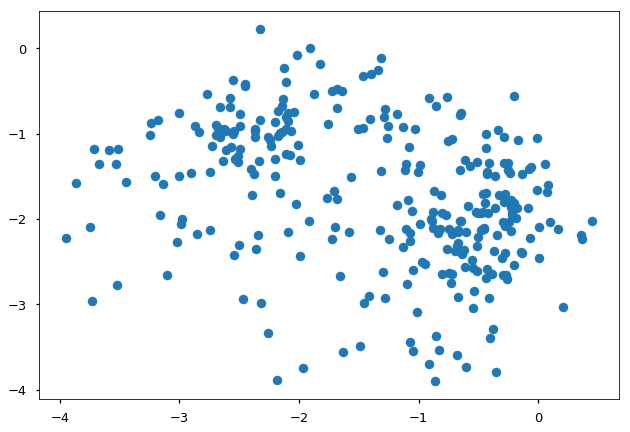

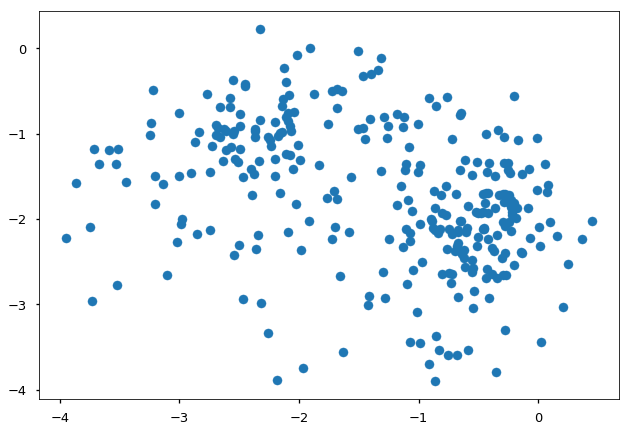

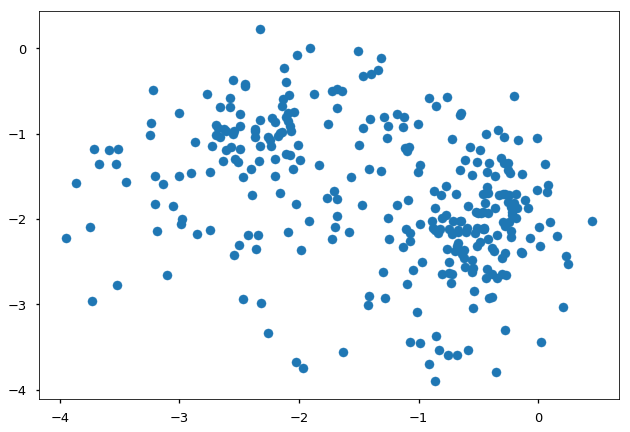

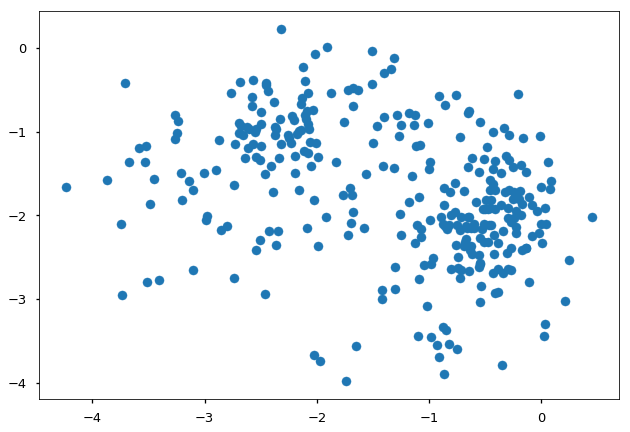

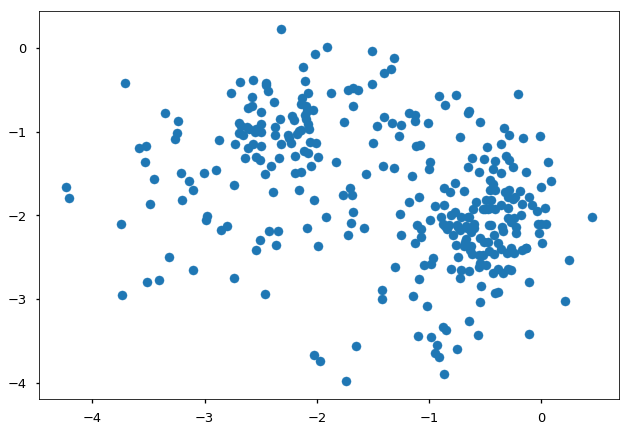

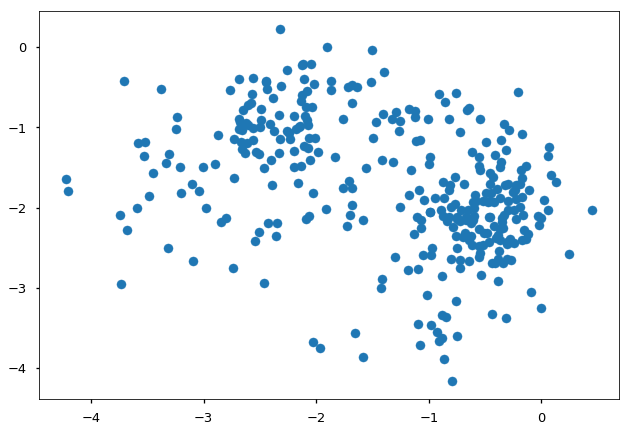

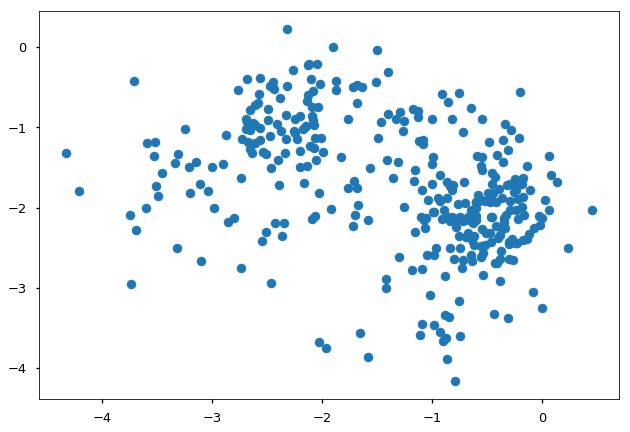

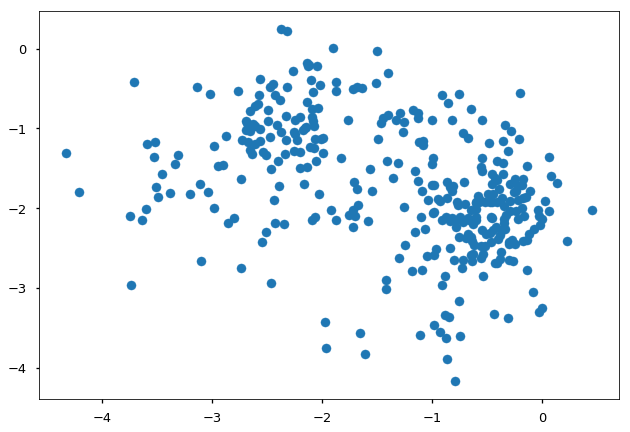

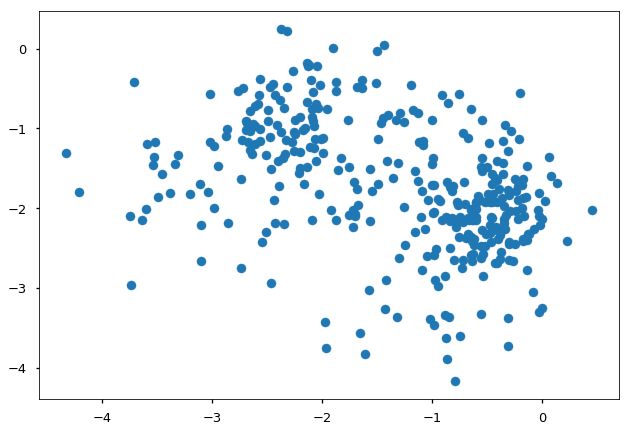

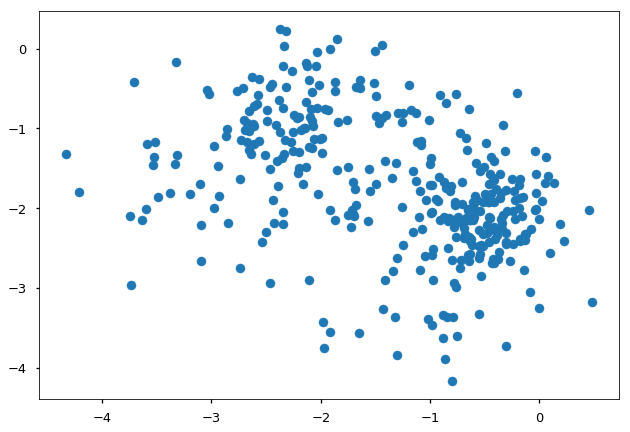

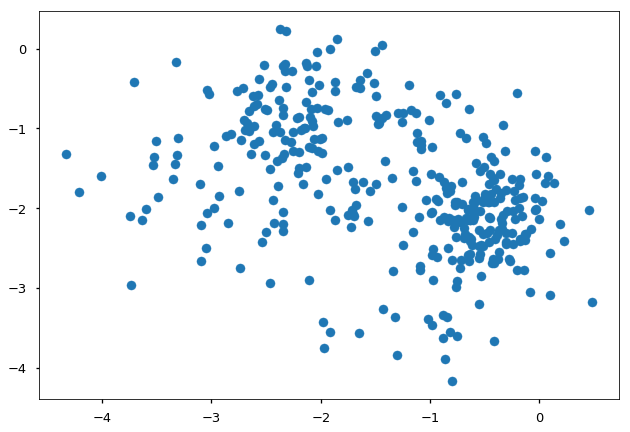

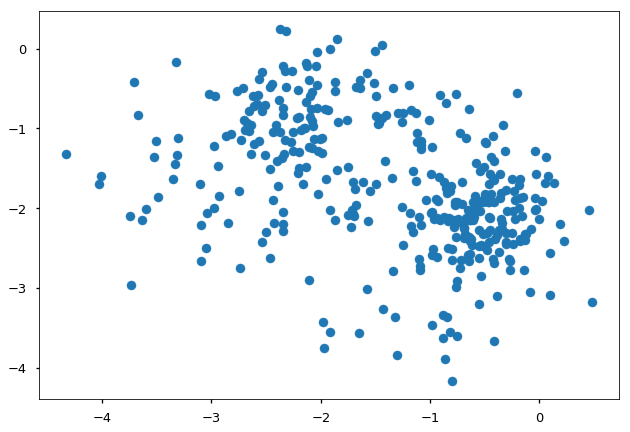

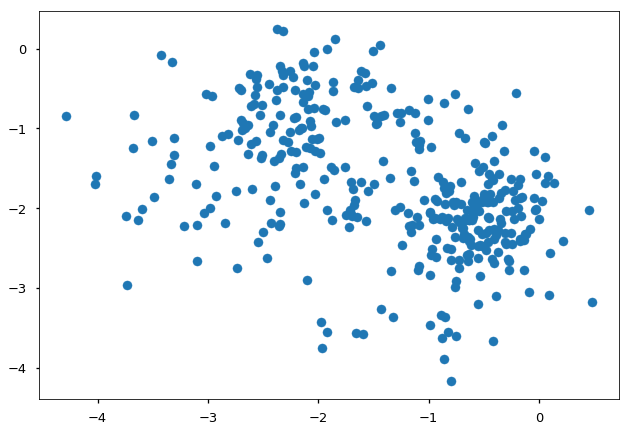

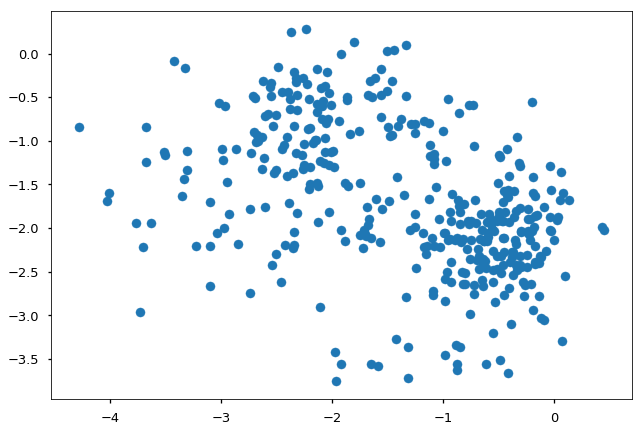

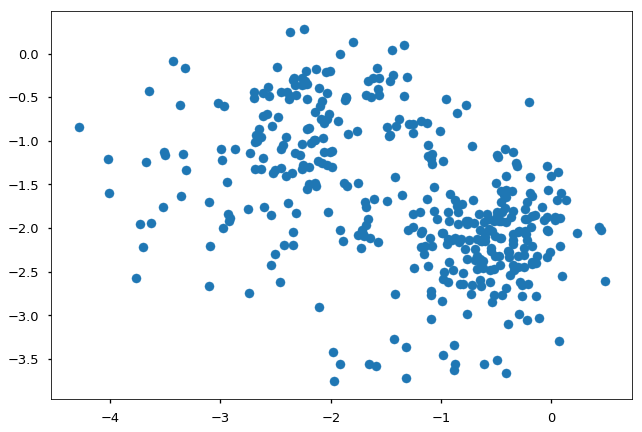

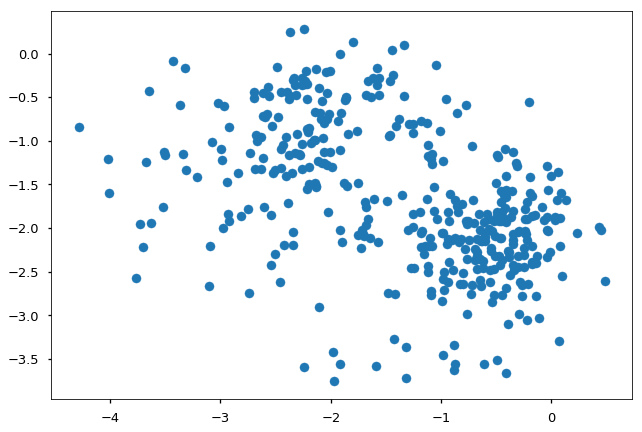

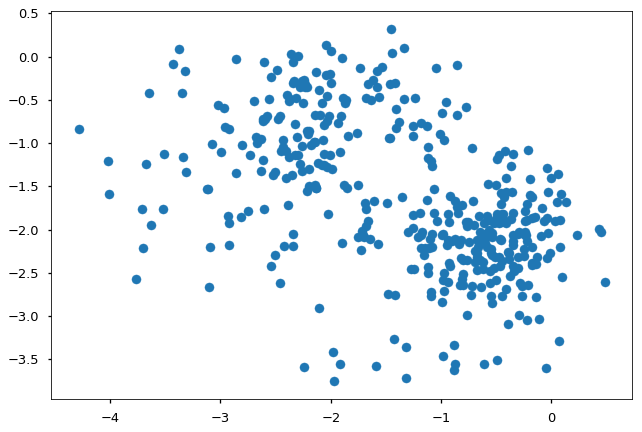

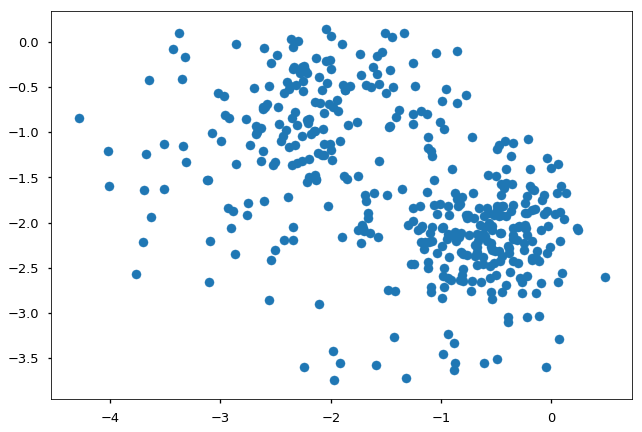

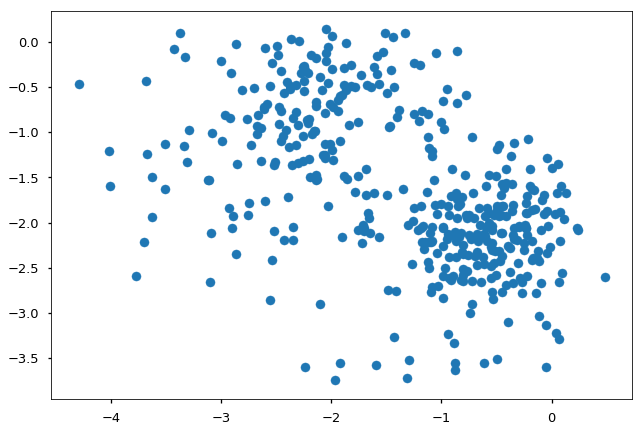

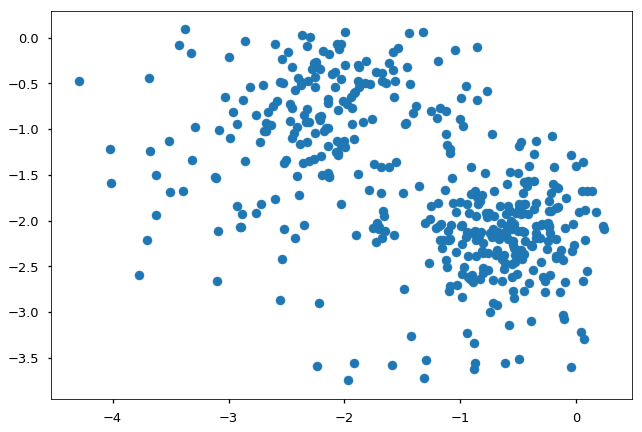

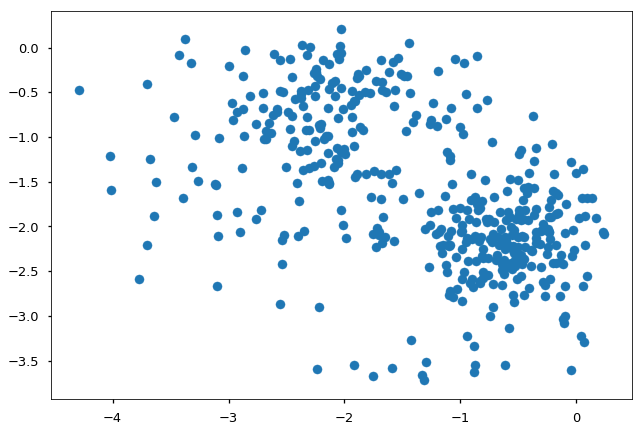

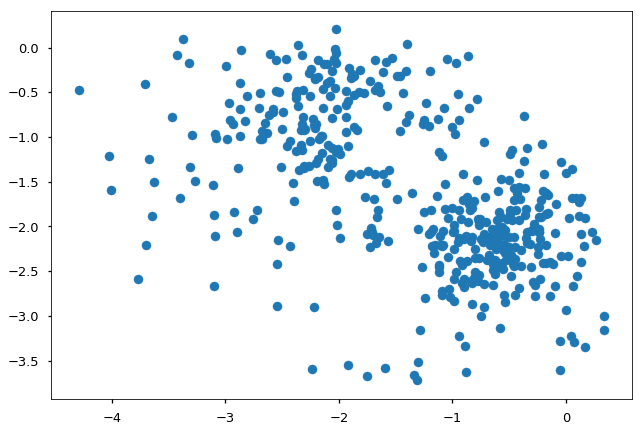

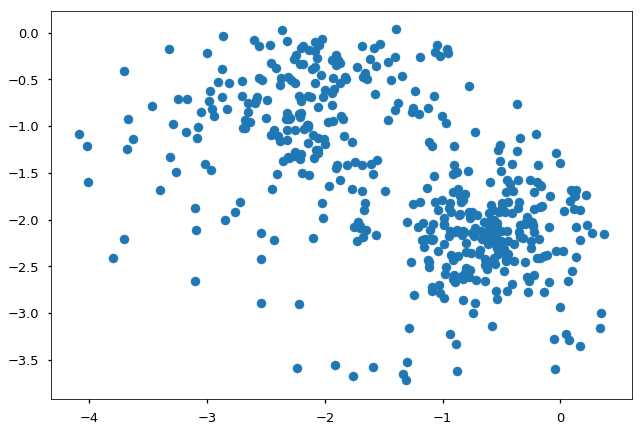

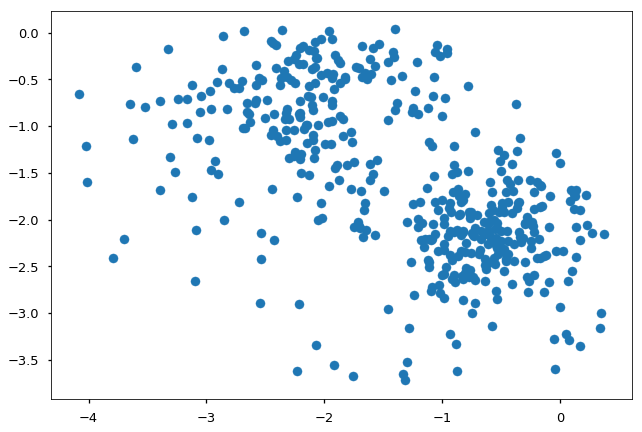

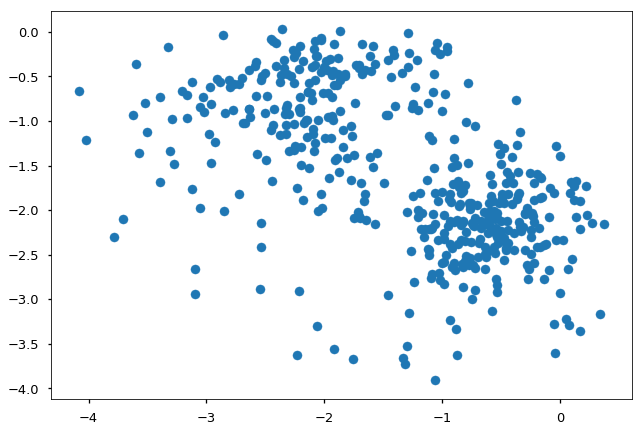

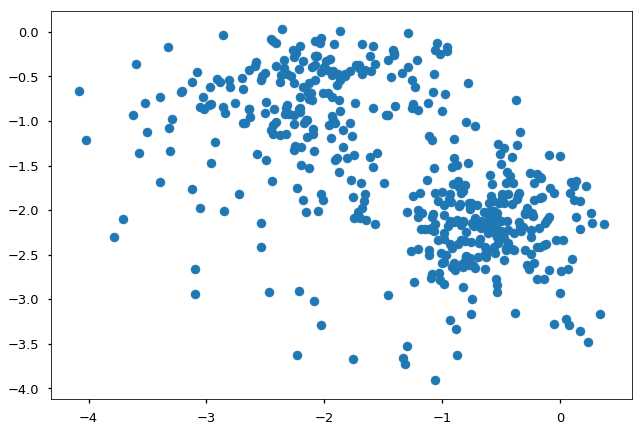

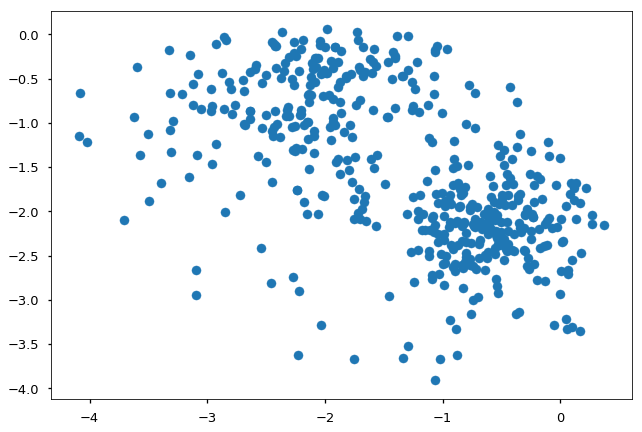

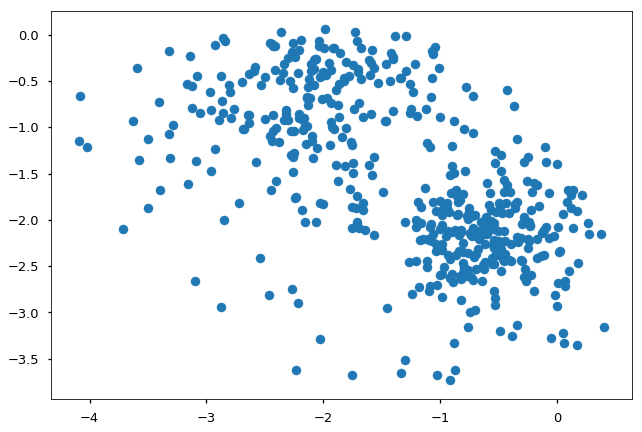

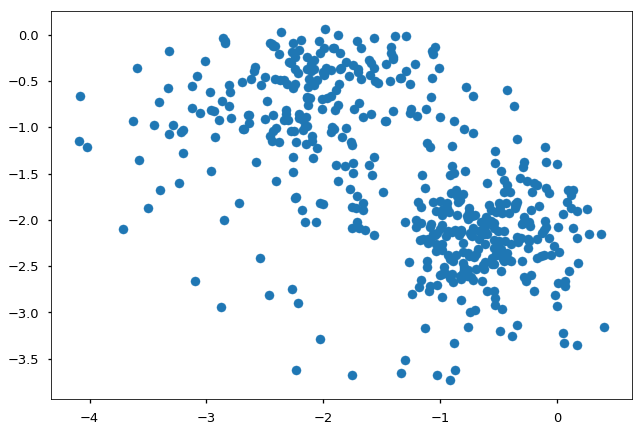

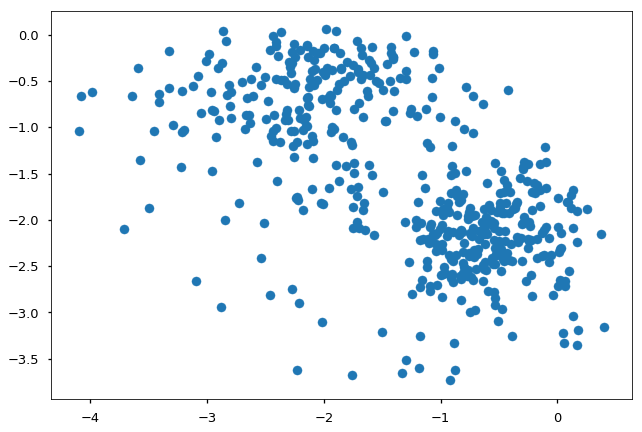

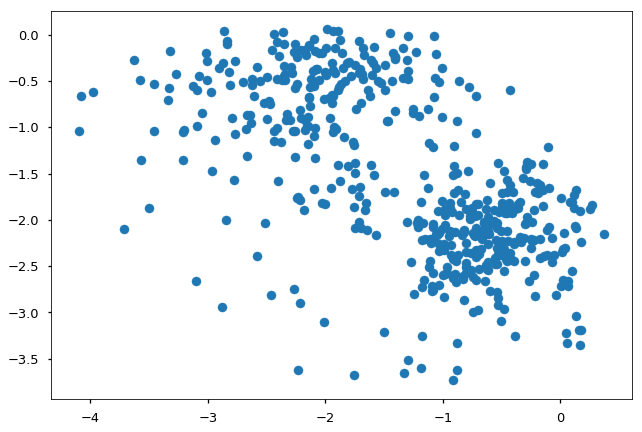

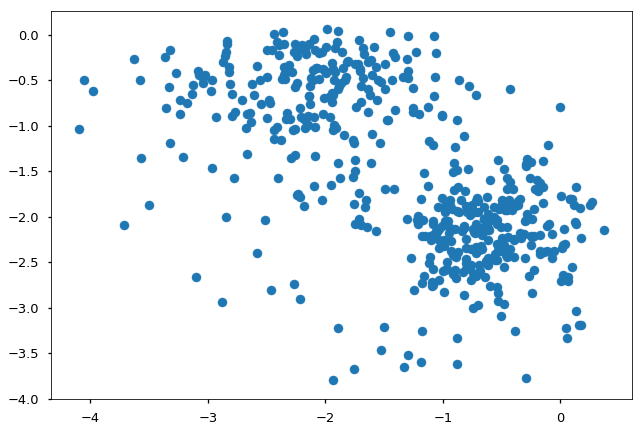

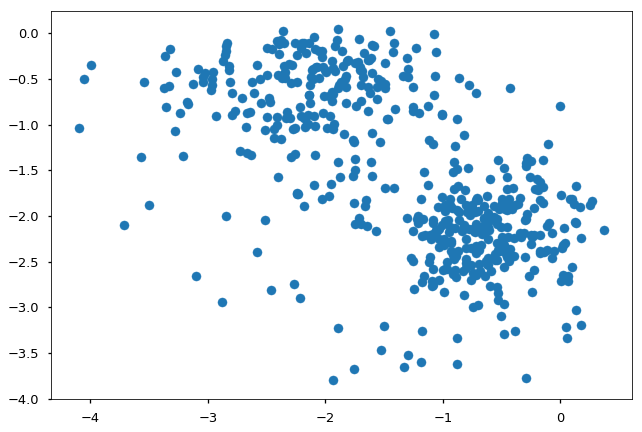

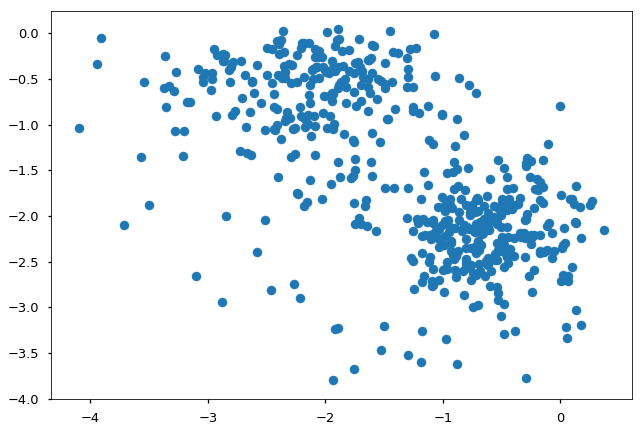

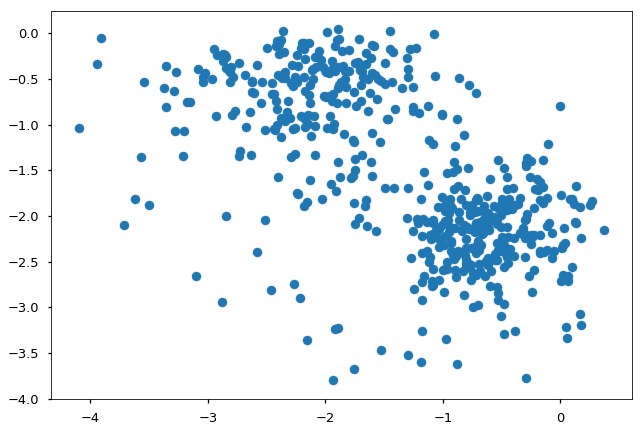

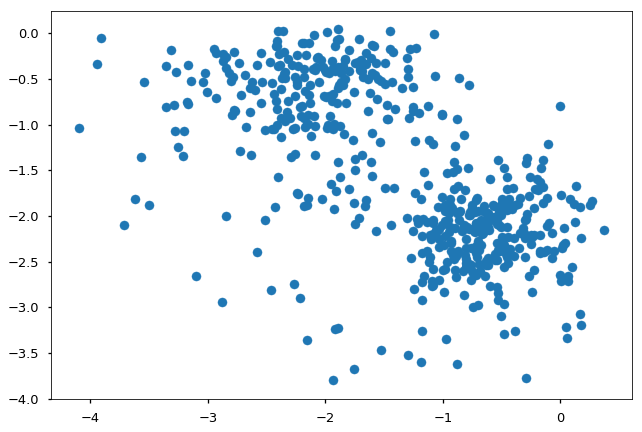

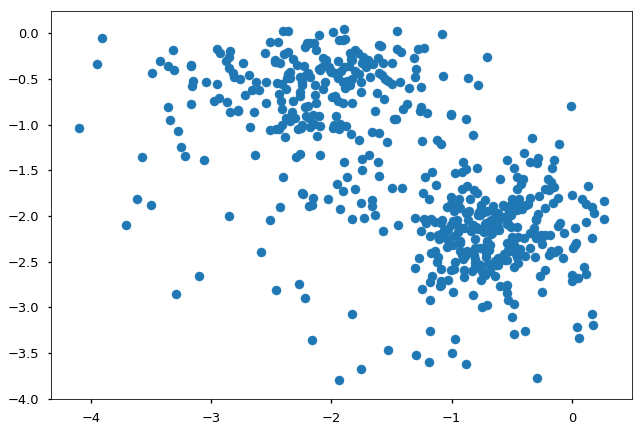

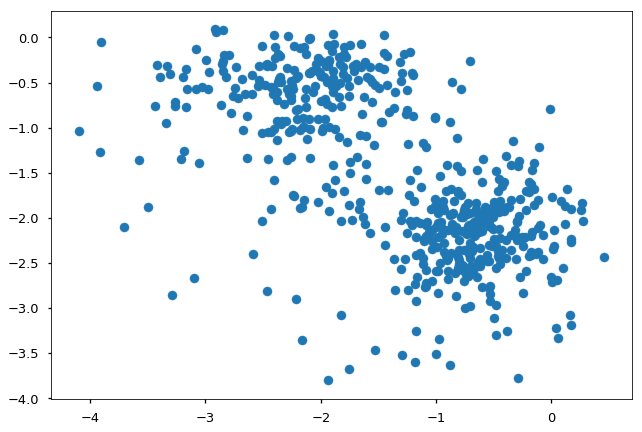

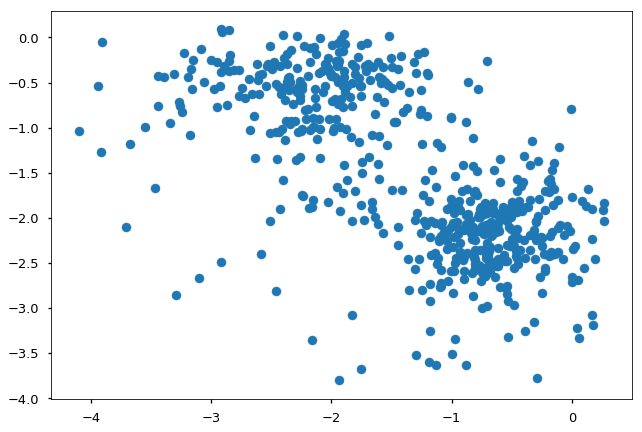

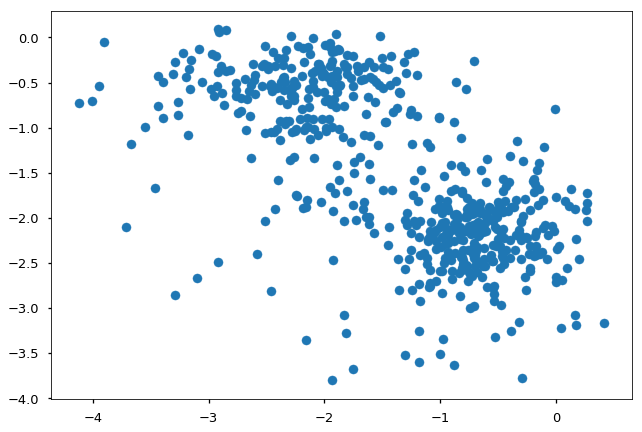

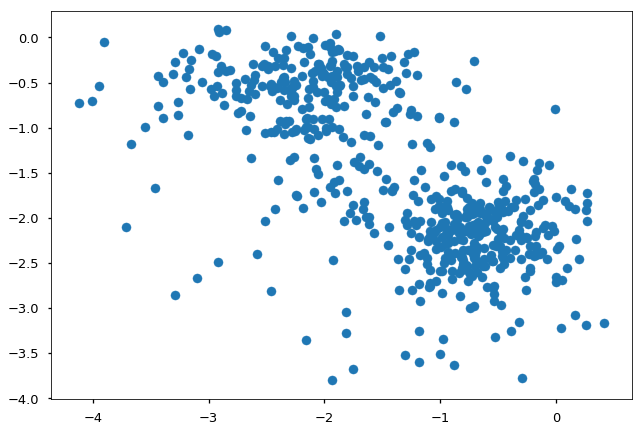

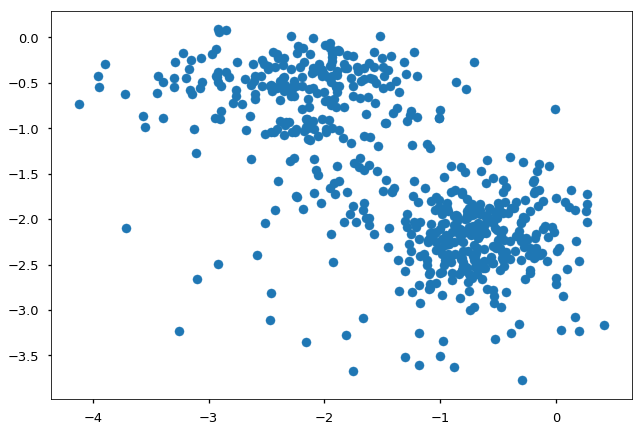

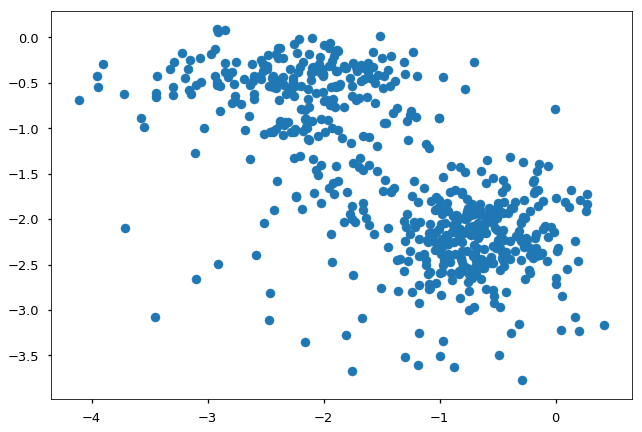

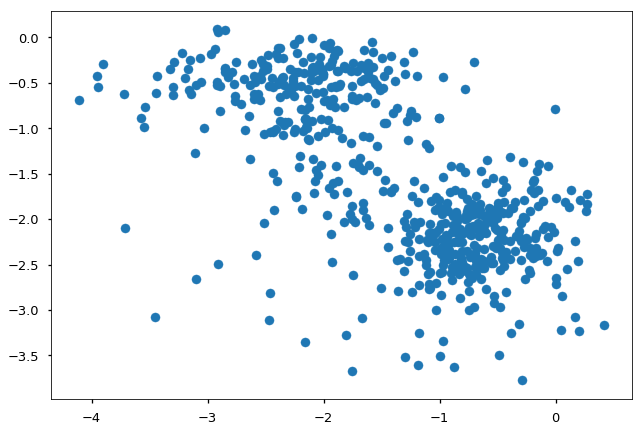

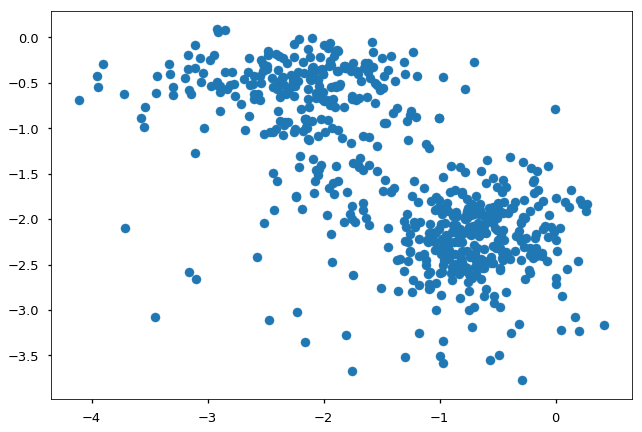

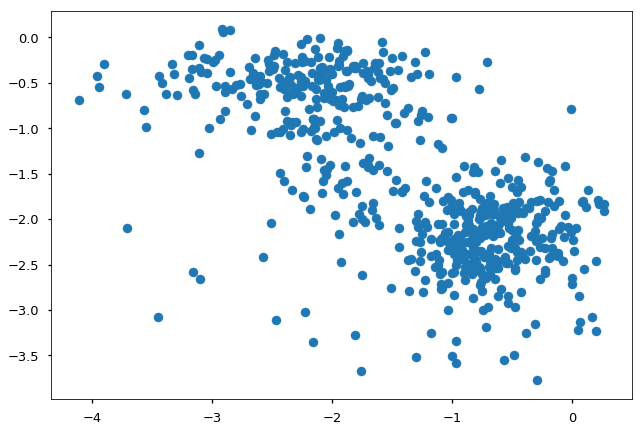

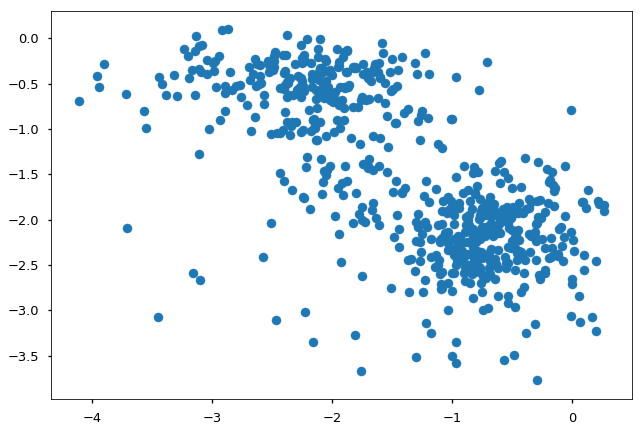

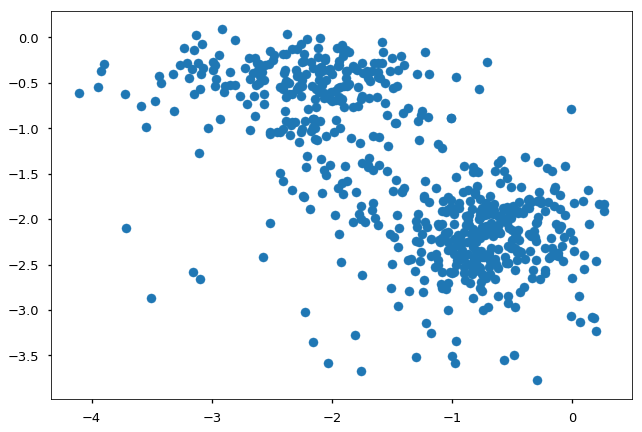

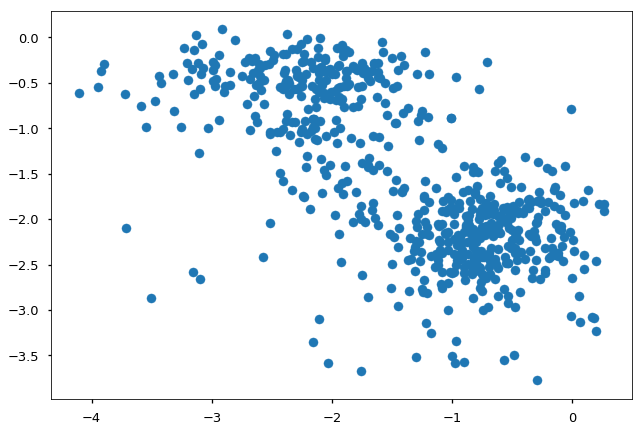

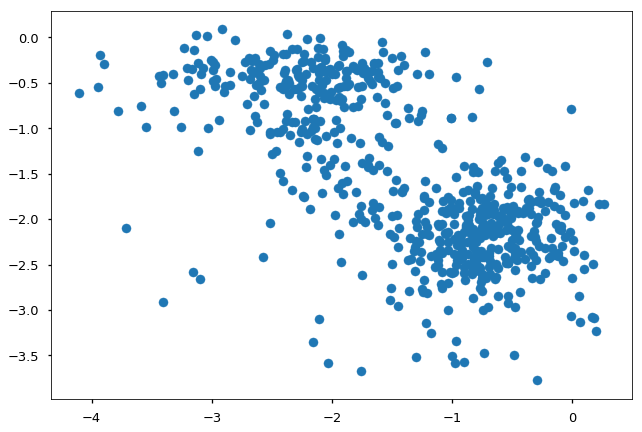

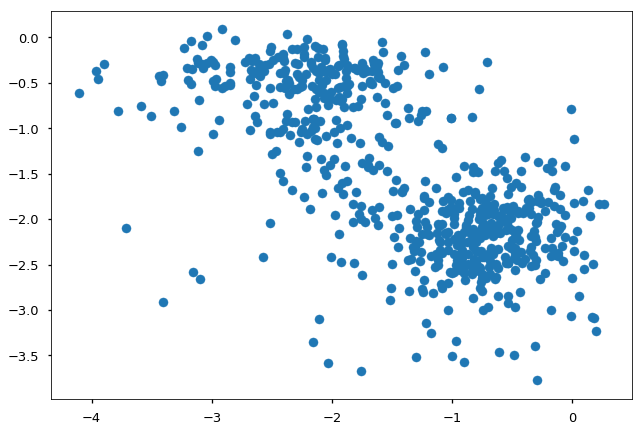

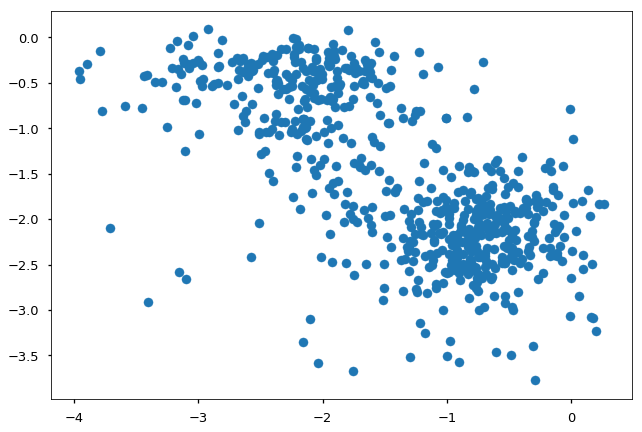

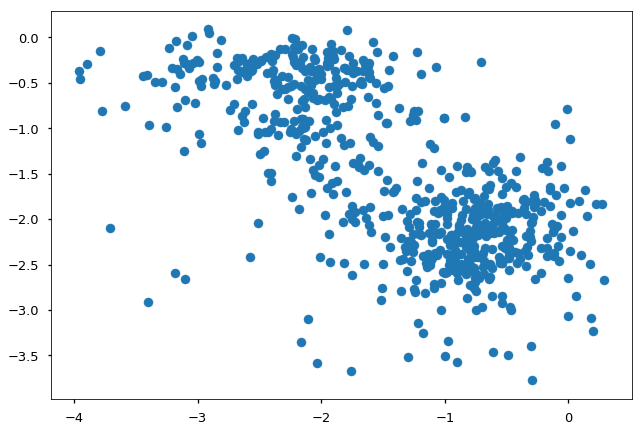

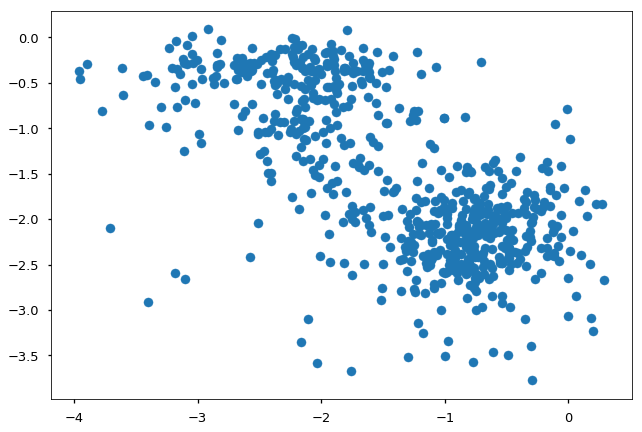

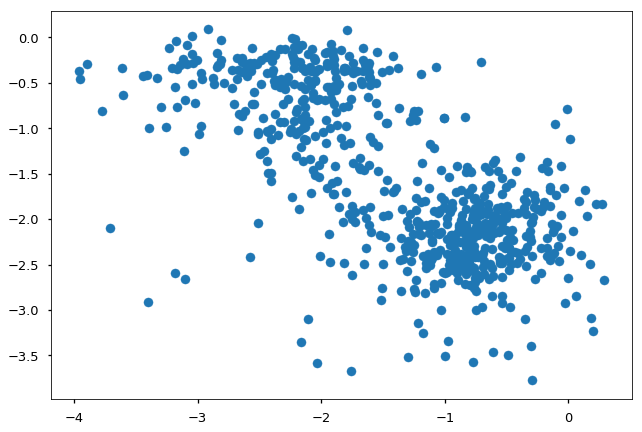

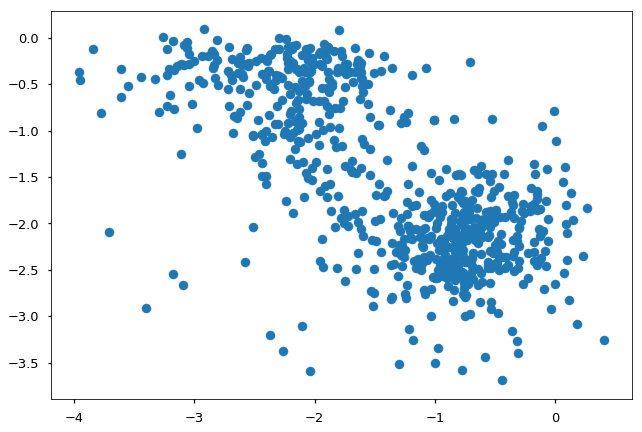

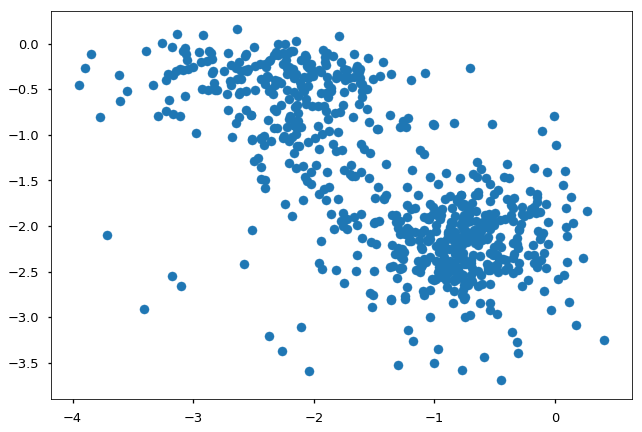

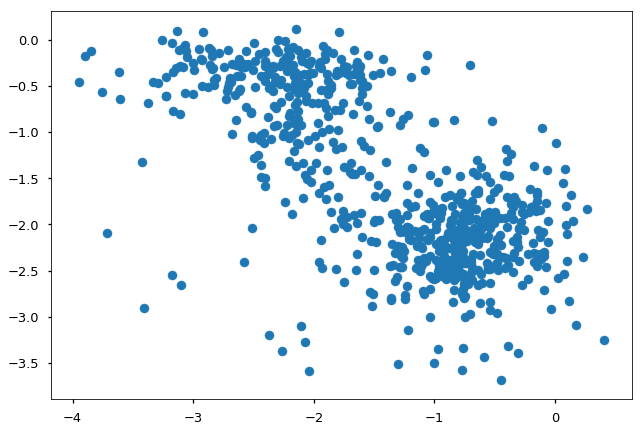

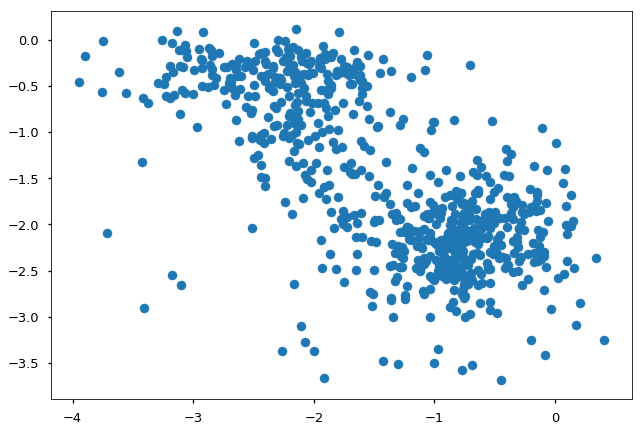

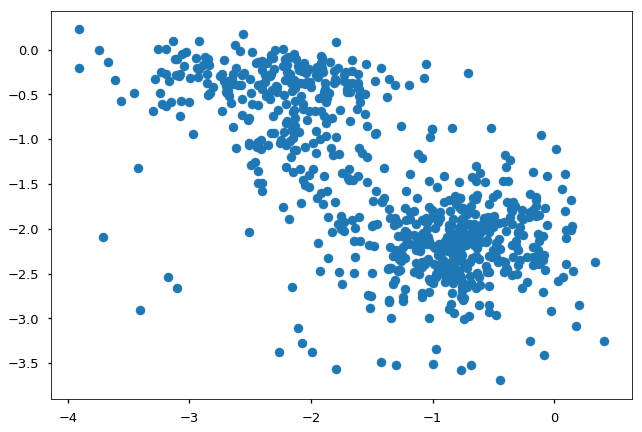

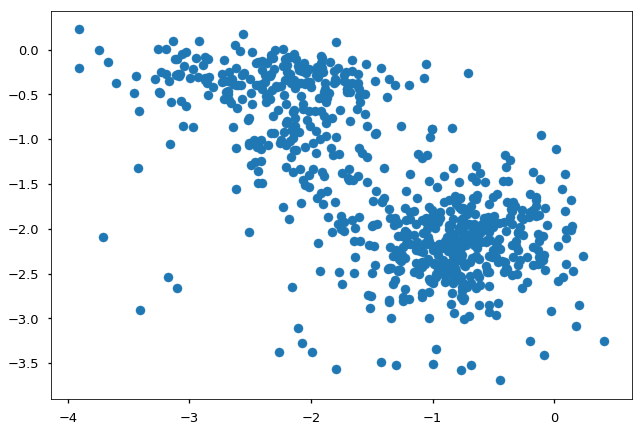

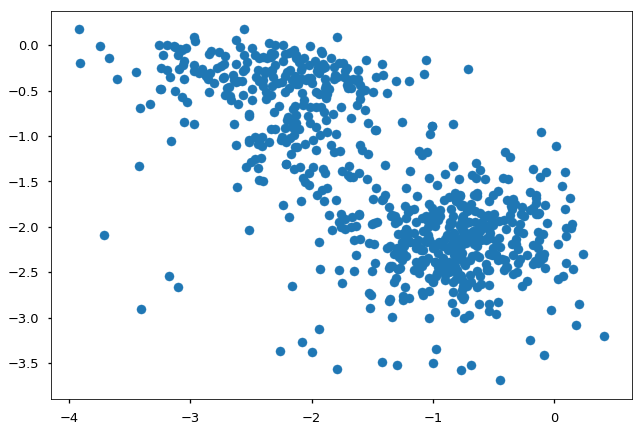

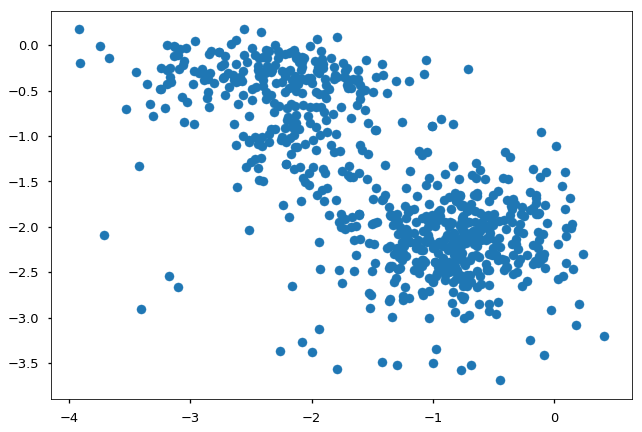

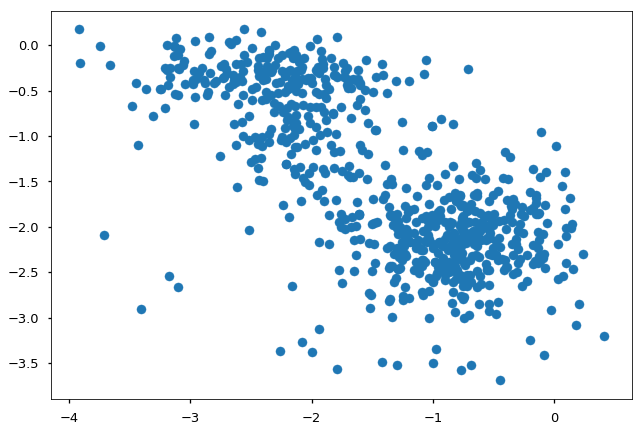

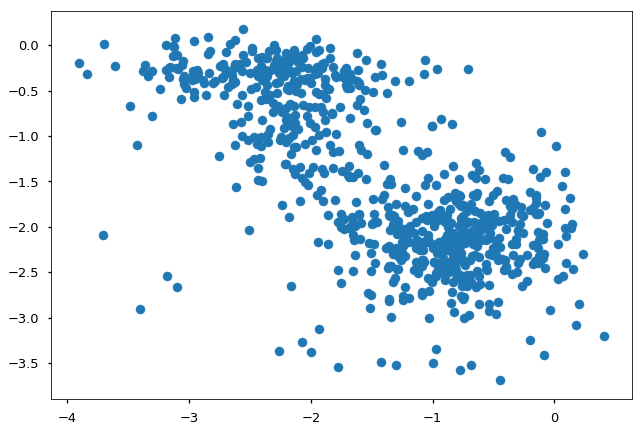

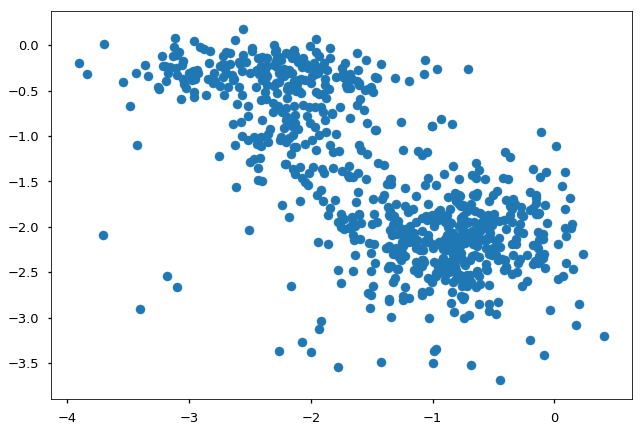

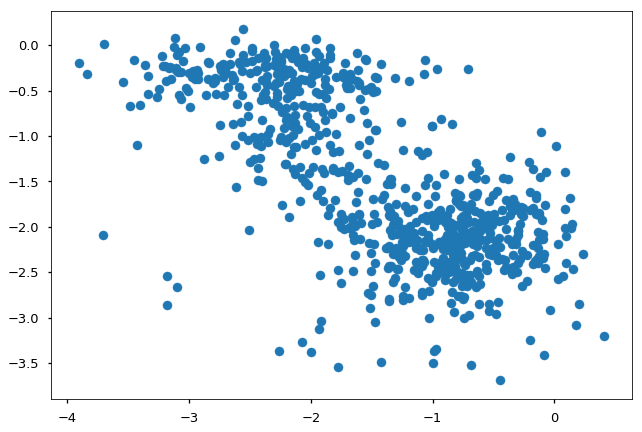

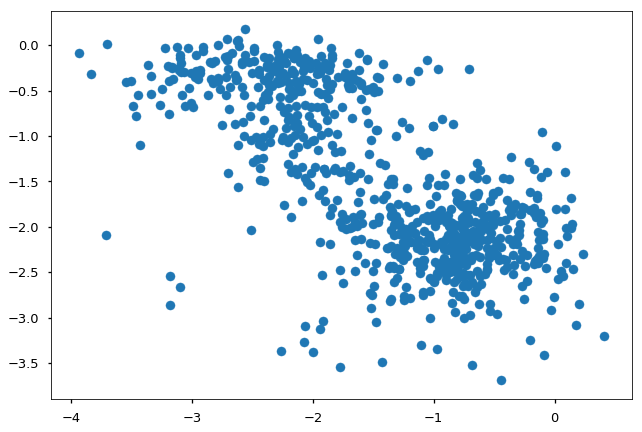

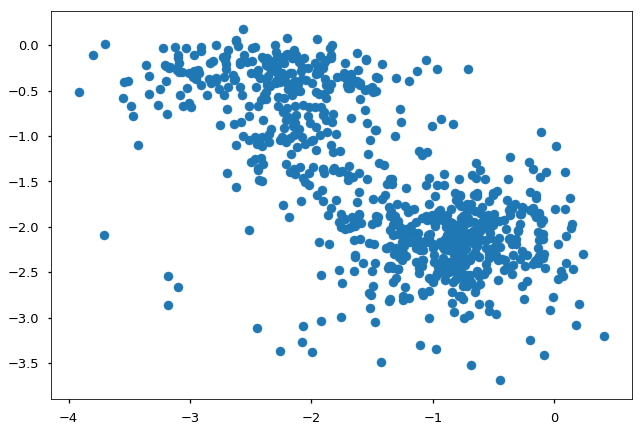

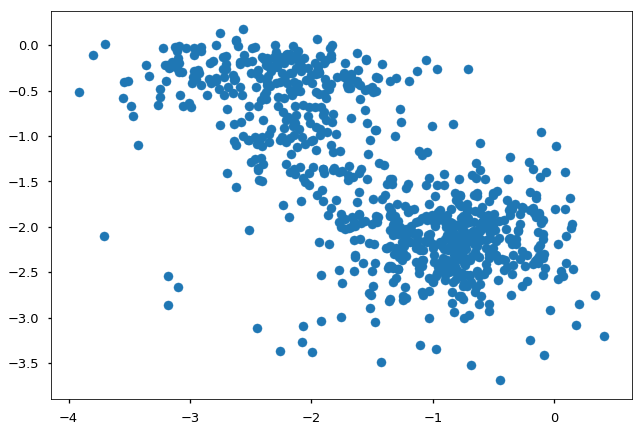

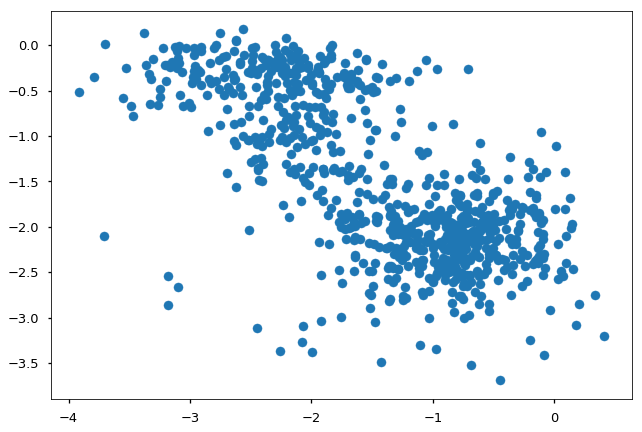

In [10]:
for i in range(1,number_of_steps):
    node_embedding = MacrostatesHandlers.time_index_macro(gd_directory,
                                         "node2vec_online_macrostates",
                                         "node2vec_online",
                                         i)
    w = np.array(node_embedding.values())
    plt.scatter(w[:,0], w[:,1],label="{0}".format(i))
    plt.show()